# Loading the dataset

In [1]:
import tensorflow as tf
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

2024-05-10 19:34:29.981830: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 19:34:30.087249: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 19:34:30.519955: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 19:34:32.692256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
EPOCHS = 50
INIT_LR = 1e-3
#to avoid crashing due to less ram
BS = 1000
default_image_size = tuple((128,128))
width=128
height=128
depth=3
inputShape=(128,128,3)


labels=[
"Tomato___Tomato_mosaic_virus",
"Tomato___Early_blight",
"Tomato___Septoria_leaf_spot",
"Tomato___Bacterial_spot",
"Tomato___Target_Spot",
"Tomato___Spider_mites",
"Tomato___Tomato_Yellow_Leaf_Curl_Virus",
"Tomato___Late_blight",
"Tomato___healthy",
"Tomato___Leaf_Mold"
]

In [3]:
def img_to_np(DIR,flatten=True):
  #canny edge detection by resizing
  cv_img=mpimg.imread(DIR,0)
  cv_img=cv2.resize(cv_img,default_image_size)
  img = np.uint8(cv_img)
  #img = np.uint8((0.2126 * img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
  #flatten it
  if(flatten):
    img=img.flatten()
  return img

In [4]:
TRAIN_DIR="../data/input/train/"
index=0
data={}
for FOLDER in os.listdir(TRAIN_DIR):
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      if index not in data:
        data[index]=[]
      try:  
        data[index].append(img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir))
      except:
        print("Error to load the image "+TRAIN_DIR+FOLDER+"/"+image_dir)
    index=index+1  

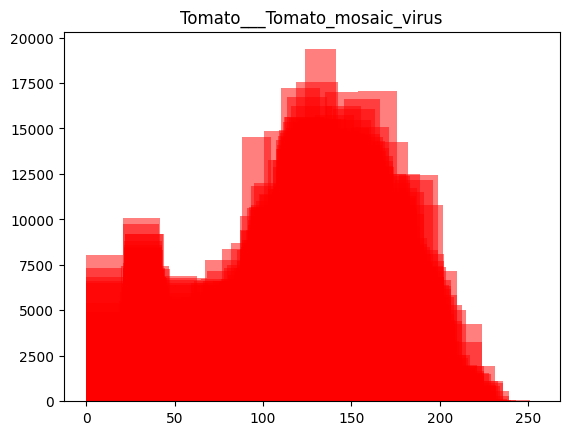

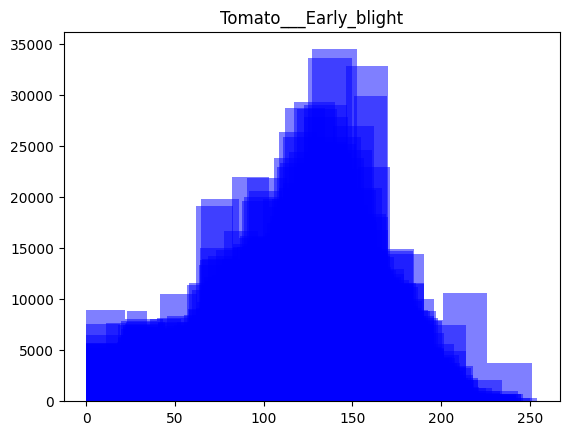

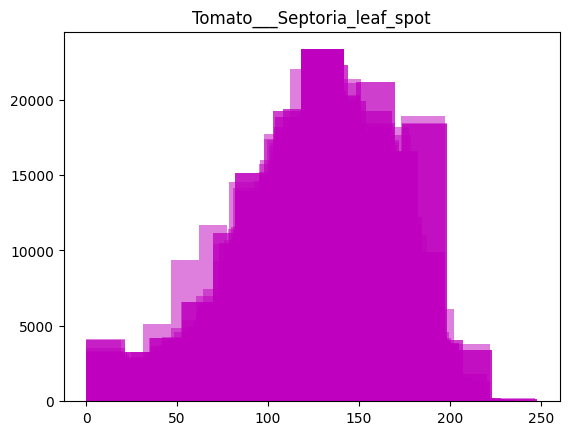

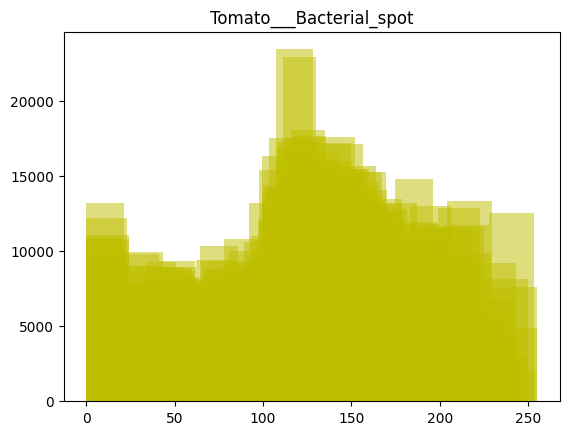

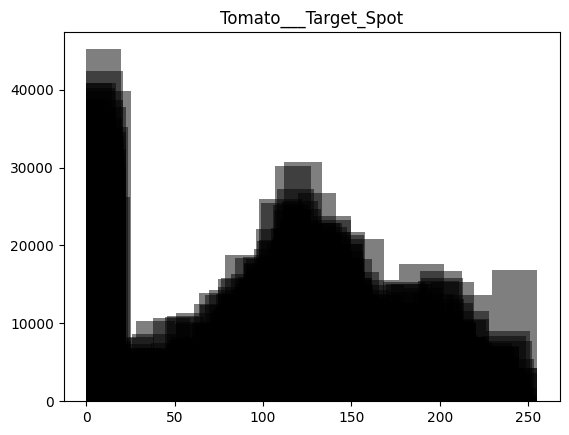

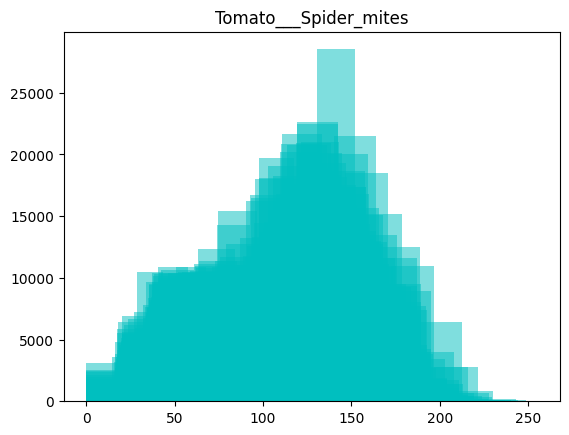

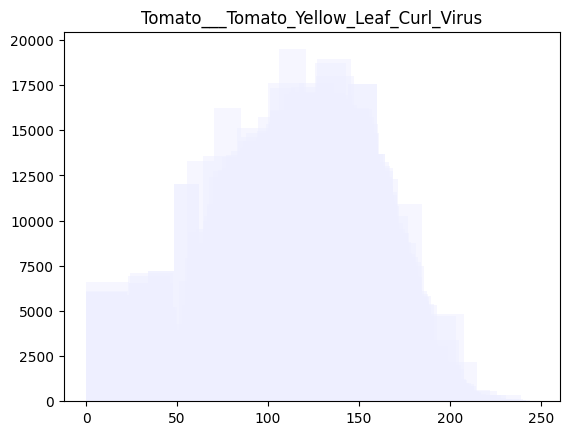

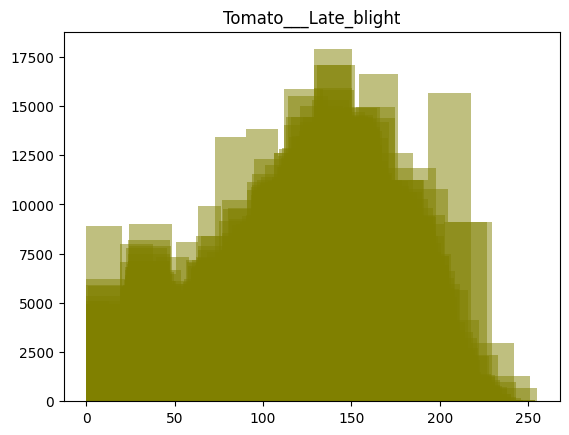

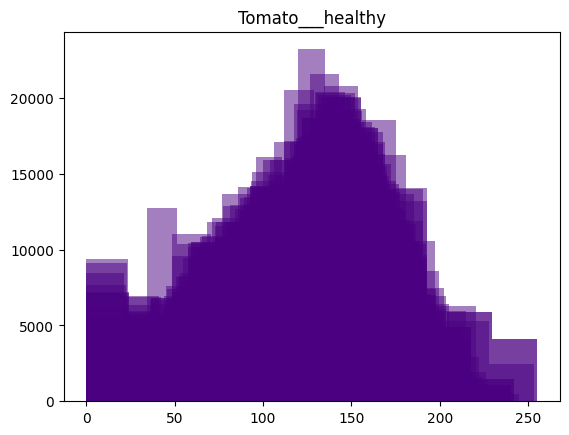

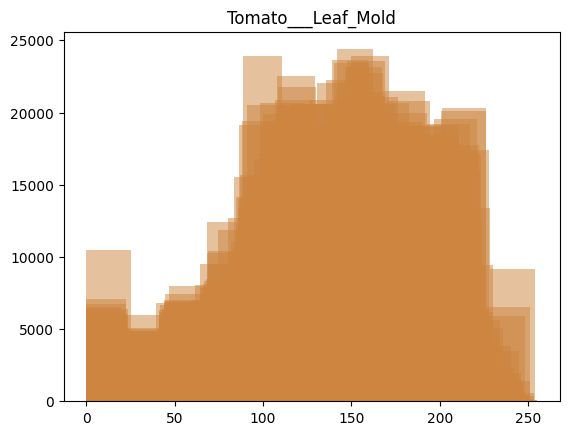

In [5]:
CLASS_LIMIT=500
colors=["r","b","m","y","k","c","#eeefff","#808000","#4B0082","#CD853F"]
for index_class in range(len(data)):
  index=0
  for arr in data[index_class]:
    plt.hist(arr,color=colors[index_class],alpha=0.5)
    if(index>CLASS_LIMIT):
      plt.title(labels[index_class])
      plt.show()
      break
    index=index+1   

In [6]:
labelencoder = LabelBinarizer()
label=labelencoder.fit_transform([0,1,2,3,4,5,6,7,8,9])
label

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [7]:
TRAIN_DIR="../data/input/train/"
index=0
data=[]
for FOLDER in os.listdir(TRAIN_DIR):
    print(TRAIN_DIR+FOLDER)
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      data.append({"x":img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[index]})
    index=index+1
x,y=[],[]
for obj in data:
  x.append(obj["x"])
  y.append(obj["y"])
x_train = np.array(x,dtype=np.float16)
y_train = np.array(y,dtype=np.float16)   

../data/input/train/Tomato___Spider_mites Two-spotted_spider_mite
../data/input/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
../data/input/train/Tomato___Tomato_mosaic_virus
../data/input/train/Tomato___Early_blight
../data/input/train/Tomato___Late_blight
../data/input/train/Tomato___Bacterial_spot
../data/input/train/Tomato___healthy
../data/input/train/Tomato___Target_Spot
../data/input/train/Tomato___Leaf_Mold
../data/input/train/Tomato___Septoria_leaf_spot


In [8]:
TEST_DIR="../data/input/val/"
index=0
data=[]
for FOLDER in os.listdir(TEST_DIR):
    print(TRAIN_DIR+FOLDER)
    for image_dir in os.listdir(TEST_DIR+FOLDER):
      data.append({"x":img_to_np(TEST_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[index]})
    index=index+1
x,y=[],[]
for obj in data:
  x.append(obj["x"])
  y.append(obj["y"])
x_test = np.array(x,dtype=np.float16)
y_test = np.array(y,dtype=np.float16)

../data/input/train/Tomato___Spider_mites Two-spotted_spider_mite
../data/input/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
../data/input/train/Tomato___Tomato_mosaic_virus
../data/input/train/Tomato___Early_blight
../data/input/train/Tomato___Late_blight
../data/input/train/Tomato___Bacterial_spot
../data/input/train/Tomato___healthy
../data/input/train/Tomato___Target_Spot
../data/input/train/Tomato___Leaf_Mold
../data/input/train/Tomato___Septoria_leaf_spot


In [9]:
model = Sequential()
chanDim=-1
model.add(Conv2D(128, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

/home/qirun/tomato_disease/tomato_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 42, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 42, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 42, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 42, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 42, 42, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 42, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,719,050 (52.33 MB)

 Trainable params: 13,715,722 (52.32 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
# aug = ImageDataGenerator(fill_mode="nearest")
model_history = model.fit(
    # aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
)

In [ ]:
model.save("../models/model_from_scratch.h5")

In [ ]:
scores = model.evaluate(x_test, y_test)
print("Accuracy is :"+str(scores[1]*100)+" %")